<a href="https://colab.research.google.com/github/SouroMLhub/Cifar_10/blob/master/PCA_on_Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

In [2]:
upload = files.upload()

Saving cache.py to cache.py


In [3]:
upload = files.upload()

Saving Cifar_10.py to Cifar_10.py


In [4]:
upload = files.upload()

Saving dataset.py to dataset.py


In [5]:
upload = files.upload()

Saving download.py to download.py


In [6]:
!python cache.py

Computing expensive_function() ...
- Data saved to cache-file: cache_expensive_function.pkl
result = 56088

Creating object from ExpensiveClass() ...
- Data saved to cache-file: cache_ExpensiveClass.pkl
c = 123
d = 456
result = c * d = 56088


In [0]:
!python download.py

In [0]:
!python dataset.py

In [0]:
!python Cifar_10.py

# Cifar 10 implementation

In [0]:
#importing libraries
import Cifar_10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Importing Datasets

In [0]:
Cifar_10.data_path = "data/CIFAR-10/"

In [15]:
#downloading dataset
Cifar_10.maybe_download_and_extract()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [16]:
class_names = Cifar_10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [17]:
images_train, cls_train, labels_train = Cifar_10.load_training_data()
images_test, cls_test, labels_test = Cifar_10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [19]:
images_train.shape

(50000, 32, 32, 3)

In [20]:
images_test.shape

(10000, 32, 32, 3)

In [43]:
#changing the shape of the image
x_train = images_train.reshape(images_train.shape[0],  -1)
x_train.shape

(50000, 3072)

In [44]:
x_test = images_test.reshape(images_test.shape[0], -1)
x_test.shape

(10000, 3072)

In [45]:
y_train = cls_train
y_train.shape

(50000,)

In [46]:
y_test = cls_test
y_test.shape

(10000,)

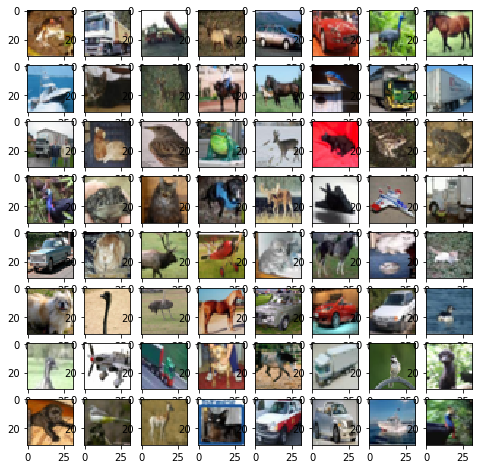

In [48]:
#plotting the image(first 64)
fig = plt.figure(figsize=(8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(images_train[i], cmap = plt.cm.bone)
plt.show()

In [49]:
#applying pca
pca = PCA()
pca.fit_transform(x_train)

array([[-6.40101763e+00,  2.72903876e+00,  1.50171052e+00, ...,
        -7.62287826e-04, -1.16359323e-03, -3.49768400e-04],
       [ 8.29783385e-01, -9.49943219e-01,  6.00375260e+00, ...,
         1.08434589e-04,  5.76715387e-04, -7.71005927e-04],
       [ 7.73019978e+00, -1.15221023e+01, -2.75362051e+00, ...,
        -1.04460109e-03, -2.14105740e-04, -3.93469526e-04],
       ...,
       [ 7.07346587e-01, -1.13425212e+01, -3.93914878e-01, ...,
        -3.80341568e-04,  1.86432348e-03,  1.44785229e-03],
       [ 1.13679090e+01, -3.37597765e+00,  5.56619766e+00, ...,
        -4.67096832e-04,  7.44972963e-04, -1.67065056e-03],
       [ 4.19279645e+00, -1.18418848e+00, -4.44596297e+00, ...,
         9.67968258e-04,  2.40363971e-04, -2.80506224e-05]])

In [51]:
pca.explained_variance_

array([5.53633226e+01, 2.14265348e+01, 1.27464910e+01, ...,
       1.64690026e-06, 1.60936325e-06, 1.58719044e-06])

In [52]:
pca.explained_variance_ratio_

array([2.90766299e-01, 1.12531437e-01, 6.69441396e-02, ...,
       8.64946450e-09, 8.45232138e-09, 8.33587056e-09])

In [53]:
pca.explained_variance_.shape

(3072,)

In [54]:
#calculating optimal k for our pca(components)
k = 0
CurrentSum =0
while CurrentSum<0.99:
  CurrentSum += pca.explained_variance_ratio_[k]
  k += 1
k

658

In [0]:
#applying pca with component
pca = PCA(n_components=k, whiten=True)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Predicting using classifiers




In [0]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    RandomForestClassifier(n_estimators=200)]

In [0]:
# dense_features=x_train_pca.toarray()
# dense_test= x_test_pca.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(x_train_pca,y_train)
        pred = fit.predict(x_test_pca)
    except Exception:
        fit = classifier.fit(x_train_pca,y_train)
        pred = fit.predict(x_test_pca)
    accuracy = accuracy_score(y_test,pred)
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of LogisticRegressionis 0.3983
Accuracy of KNeighborsClassifieris 0.1484


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
